In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/segmentation/segmentation.csv', index_col=0)

In [3]:
df.head()

,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
1,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
2,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
3,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
4,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,28.217544,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
5,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,20.474265,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159


In [4]:
list(df.columns)

['Cell',
 'Case',
 'Class',
 'AngleCh1',
 'AngleStatusCh1',
 'AreaCh1',
 'AreaStatusCh1',
 'AvgIntenCh1',
 'AvgIntenCh2',
 'AvgIntenCh3',
 'AvgIntenCh4',
 'AvgIntenStatusCh1',
 'AvgIntenStatusCh2',
 'AvgIntenStatusCh3',
 'AvgIntenStatusCh4',
 'ConvexHullAreaRatioCh1',
 'ConvexHullAreaRatioStatusCh1',
 'ConvexHullPerimRatioCh1',
 'ConvexHullPerimRatioStatusCh1',
 'DiffIntenDensityCh1',
 'DiffIntenDensityCh3',
 'DiffIntenDensityCh4',
 'DiffIntenDensityStatusCh1',
 'DiffIntenDensityStatusCh3',
 'DiffIntenDensityStatusCh4',
 'EntropyIntenCh1',
 'EntropyIntenCh3',
 'EntropyIntenCh4',
 'EntropyIntenStatusCh1',
 'EntropyIntenStatusCh3',
 'EntropyIntenStatusCh4',
 'EqCircDiamCh1',
 'EqCircDiamStatusCh1',
 'EqEllipseLWRCh1',
 'EqEllipseLWRStatusCh1',
 'EqEllipseOblateVolCh1',
 'EqEllipseOblateVolStatusCh1',
 'EqEllipseProlateVolCh1',
 'EqEllipseProlateVolStatusCh1',
 'EqSphereAreaCh1',
 'EqSphereAreaStatusCh1',
 'EqSphereVolCh1',
 'EqSphereVolStatusCh1',
 'FiberAlign2Ch3',
 'FiberAlign2Ch4',
 '

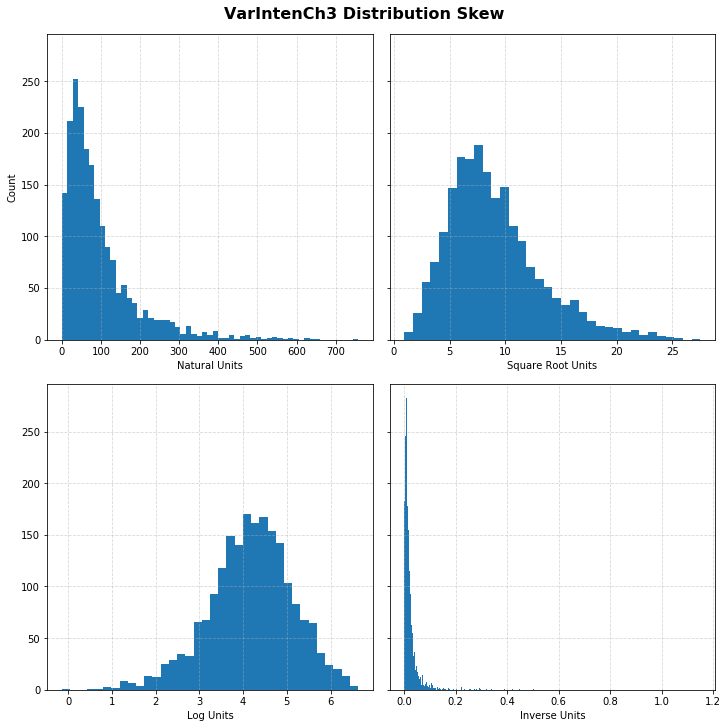

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True, sharey=True)
fig.suptitle('VarIntenCh3 Distribution Skew', fontsize=16, weight='bold')

ax = axes[0, 0]
ax.hist(df['VarIntenCh3'], bins='auto')
ax.set_xlabel('Natural Units')
ax.set_ylabel('Count')

ax = axes[1, 0]
ax.hist(np.log(df['VarIntenCh3']), bins='auto')
ax.set_xlabel('Log Units')

ax = axes[0, 1]
ax.hist(np.sqrt(df['VarIntenCh3']), bins='auto')
ax.set_xlabel('Square Root Units')

ax = axes[1, 1]
ax.hist(1 / (df['VarIntenCh3']), bins='auto')
ax.set_xlabel('Inverse Units')

for ax in axes.ravel():
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [6]:
print(f"Variable skewness: {stats.skew(df['VarIntenCh3']):.3f}")

Variable skewness: 2.329


In [7]:
print(f"Estimated lambda is {stats.boxcox(df['VarIntenCh3'])[1]:.3f}")

Estimated lambda is 0.134


In [8]:
print(f"Estimated lambda is {stats.boxcox(df['PerimCh1'])[1]:.3f}")

Estimated lambda is -1.163


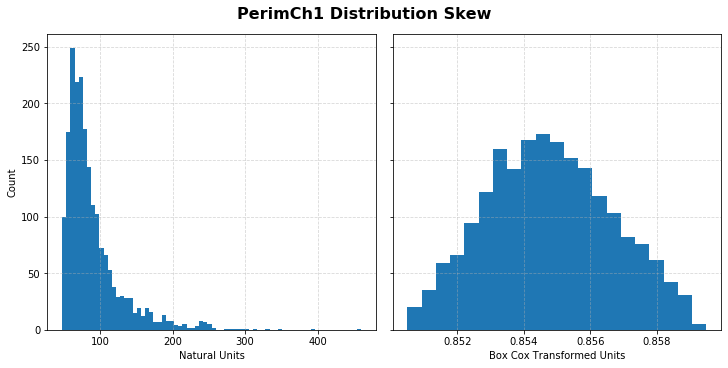

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True, sharey=True)
fig.suptitle('PerimCh1 Distribution Skew', fontsize=16, weight='bold')

ax = axes[0]
ax.hist(df['PerimCh1'], bins='auto')
ax.set_xlabel('Natural Units')
ax.set_ylabel('Count')

ax = axes[1]
ax.hist(stats.boxcox(df['PerimCh1'])[0], bins='auto')
ax.set_xlabel('Box Cox Transformed Units')

for ax in axes.ravel():
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [10]:
#toy example
intercept = -4.3
slope = 1.8

n = 500
x1_true = np.random.normal(4, 2, n)
x2_true = np.zeros(n)

# generate a random sample
for i in range(n):
    x2_true[i] = intercept + slope * x1_true[i] + np.random.normal(size=1)
    
# generate outliers
x1_outliers = np.random.uniform(-4, -3, 8)
x2_outliers = np.zeros(8)

for i in range(8):
    x2_outliers[i] = x1_outliers[i] + np.random.normal(size=1)

In [11]:
x1 = scale(np.concatenate([x1_true, x1_outliers]))
x2 = scale(np.concatenate([x2_true, x2_outliers]))

# spatial sign
dist = x1**2 + x2**2
x1 = x1 / np.sqrt(dist)
x2 = x2 / np.sqrt(dist)

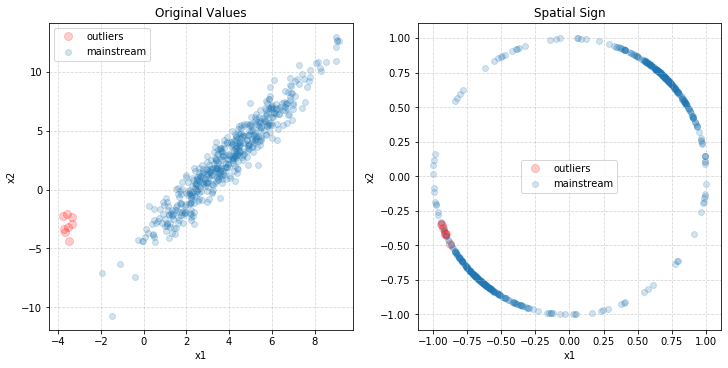

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

ax = axes[0]
ax.scatter(x1_true, x2_true, alpha=0.2, label='mainstream')
ax.plot(x1_outliers, x2_outliers, 'ro', markersize=8, alpha=0.2, label='outliers')
ax.legend(loc='best')
ax.set_title('Original Values')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax = axes[1]
plt.scatter(x1[:-8], x2[:-8], label='mainstream', alpha=0.2)
plt.plot(x1[-7:], x2[-7:], 'ro', markersize=8, label='outliers', alpha=0.2)
ax.legend(loc='best')
ax.set_title('Spatial Sign')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

for ax in axes.ravel():
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [13]:
pca = PCA().fit(df[['AvgIntenCh1', 'EntropyIntenCh1']])
print(f'Variance explained by each Principal Component {pca.explained_variance_ratio_}')

pca_transform = pca.transform(df[['AvgIntenCh1', 'EntropyIntenCh1']])

Variance explained by each Principal Component [9.99989454e-01 1.05460238e-05]


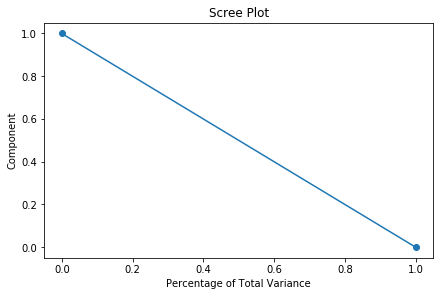

In [14]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(pca.explained_variance_ratio_, '-o')
ax.set_title('Scree Plot')
ax.set_xlabel('Percentage of Total Variance')
ax.set_ylabel('Component')

plt.show()

In [15]:
df['AvgIntenCh1_EntropyIntenCh1_PC1'] = pca_transform[:,0]
df['AvgIntenCh1_EntropyIntenCh1_PC2'] = pca_transform[:,1]

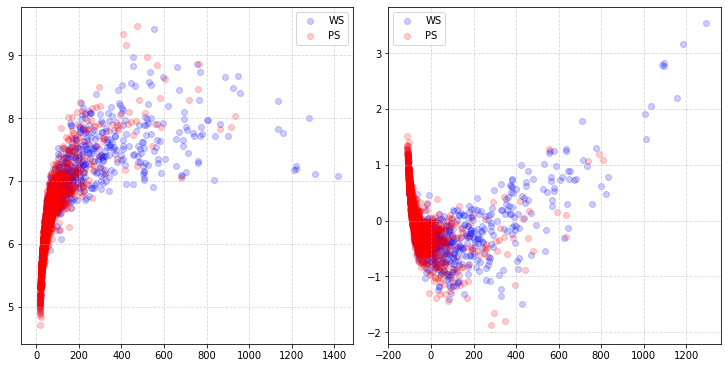

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

ax = axes[0]
df_WS = df[df['Class'] == 'WS']
ax.scatter(df_WS['AvgIntenCh1'], df_WS['EntropyIntenCh1'], c='b', label='WS', alpha=0.2)
df_PS = df[df['Class'] == 'PS']
ax.scatter(df_PS['AvgIntenCh1'], df_PS['EntropyIntenCh1'], c='r', label='PS', alpha=0.2)
ax.legend(loc='best')        


ax = axes[1]
df_WS_PCA = df[df['Class'] == 'WS']
ax.scatter(df_WS['AvgIntenCh1_EntropyIntenCh1_PC1'], df_WS['AvgIntenCh1_EntropyIntenCh1_PC2'], c='b', label='WS', alpha=0.2)
df_PS_PCA = df[df['Class'] == 'PS']
ax.scatter(df_PS['AvgIntenCh1_EntropyIntenCh1_PC1'], df_PS['AvgIntenCh1_EntropyIntenCh1_PC2'], c='r', label='PS', alpha=0.2)        
ax.legend(loc='best')        

for ax in axes.ravel():
    ax.grid(True, linestyle='--', alpha=0.5)
    
plt.show()

In [17]:
df_features = df.iloc[:,3:]

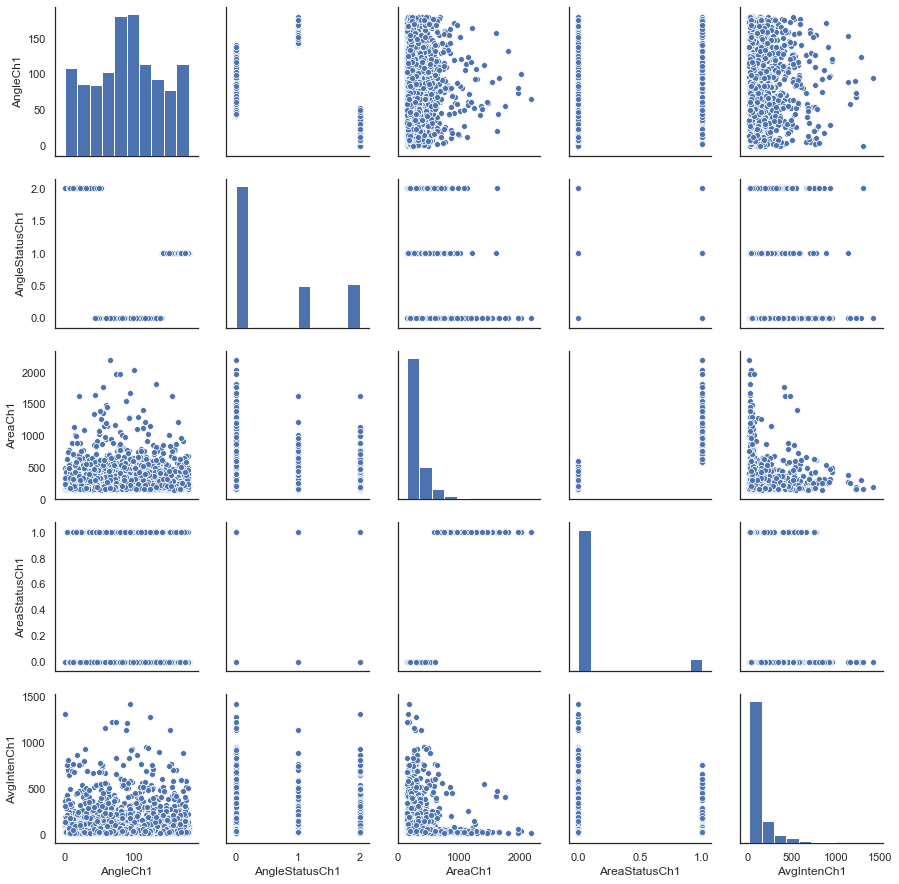

In [21]:
sns.pairplot(df_features.iloc[:,:5])

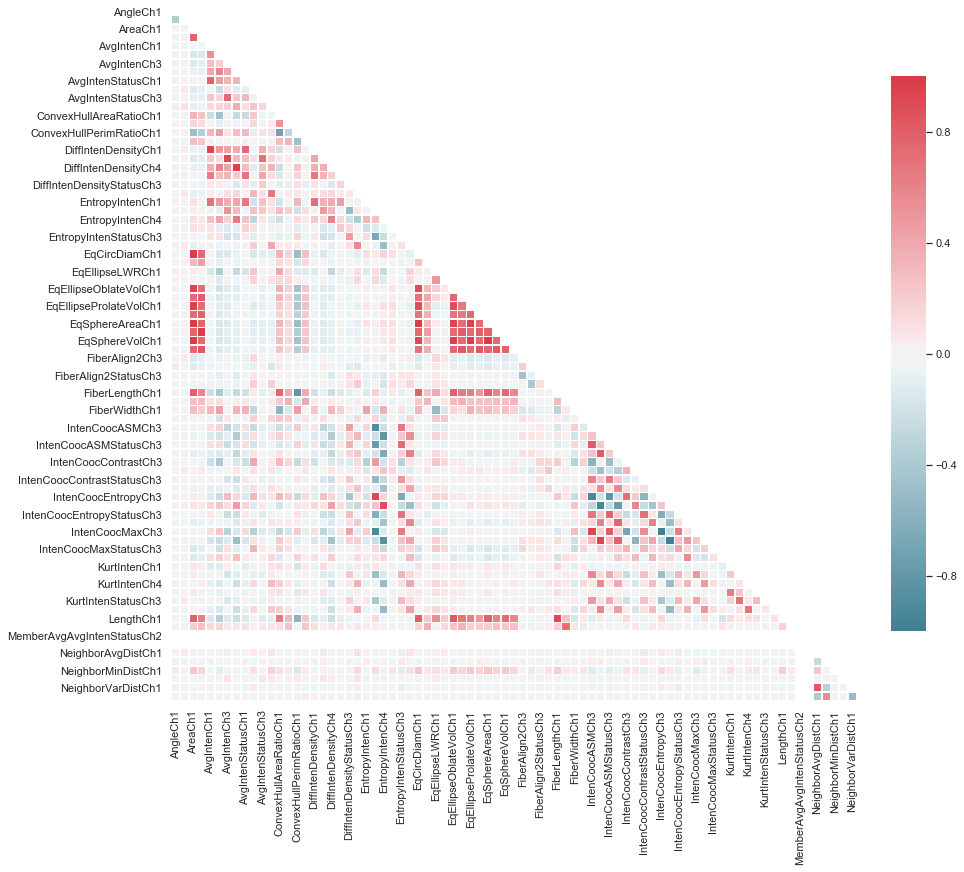

In [19]:
sns.set(style="white")

# Generate a large random datase
# Compute the correlation matrix
corr = df_features.iloc[:,:80].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12), constrained_layout=True)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, ax=ax, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

fig.suptitle('Feature Correlation')
plt.show()